# Linear Regression

To predict our rental housing prices, we will begin with a linear regression model. To find out more about the maths behind regression, check out the [following article](https://onlinestatbook.com/2/regression/regression.html).

In [252]:
"""
A simple linear regression model with all predictors and target variable of
price of unit area.
"""
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import pickle


In [253]:
# TODO: complete the following file by implementing the listed steps

# 1) New dataframe

df = pd.read_csv('C:/Users/Uma/Desktop/rental_pricing_prediction/data/processed/cleaned_data_new.csv')


# 2) Split data into an "X" set of all numeric predictors
X = df.drop(["price_unit_area"], axis = 1).values

# "y" set of the unit price
y = df["price_unit_area"].values

#First five rows of dataset
df.head()



,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
0,19.5,306.5947,9.0,42.2
1,13.3,561.9845,5.0,47.3
2,13.3,561.9845,5.0,54.8
3,5.0,390.5684,5.0,43.1
4,7.1,2175.0300,3.0,32.1


In [254]:
# 3) Split your X & y data into a training and testing set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)


In [255]:
#Train model on training set

linmod = LinearRegression()
linmod.fit(X_train,y_train)

LinearRegression()

In [256]:
#Predicted test set results

y_pred = linmod.predict(X_test)
print(y_pred)


[43.55428916 37.43437924 43.24425279 31.87575365 47.4281118  33.09566971
 46.66705729 33.94427257 42.80137694 45.05047113 46.74913886 40.63036067
 31.43457162 52.6296594  29.09351076 44.65500194 30.4897293  17.96186669
 32.28378902 32.94209151 25.0428763  41.81513052 39.65914835 34.06604272
 16.12861521 38.383144   47.61196627 49.16982546 41.76752746 33.75335157
 38.41895411 39.55470362 41.05438738 41.88362061 43.04773307 42.15754452
 46.80278867 49.00210548 23.89032793 52.24230221 49.16982546 11.36861997
 43.68902991 42.83056286 43.55428916 11.38264736 37.6128666  34.12033528
 49.16982546 46.92375885  5.50599753 33.80764413 29.92056293 38.37011747
 44.49345335 41.93194297 42.09142537 52.29659476 45.2001256  33.7826911
 32.40946645 49.14765241 33.0984073  46.36875423 45.82645018 44.12436097
 46.94440627 39.21119526 16.48557363 51.71553665  5.45170498 42.72177586
 42.09469702 47.63427384 32.74064764 32.93976833 41.95572189 43.13314049
 43.63572799 44.52624255]


In [257]:
linmod.predict([[19.5, 306.5947, 9.0]])

array([47.51553453])

In [258]:
# 5) Calculate the R2 and MSE of your linear regressor
# article: https://realpython.com/linear-regression-in-python/

r2_Score = r2_score(y_test, y_pred)
print("R2 Score", r2_Score)

M_S_E = mean_squared_error(y_test, y_pred)
print("Mean Square Error", M_S_E)

R2 Score 0.5072967410336526
Mean Square Error 92.32113537952252


Text(0.5, 1.0, 'Actual Values vs. Predicted Values')

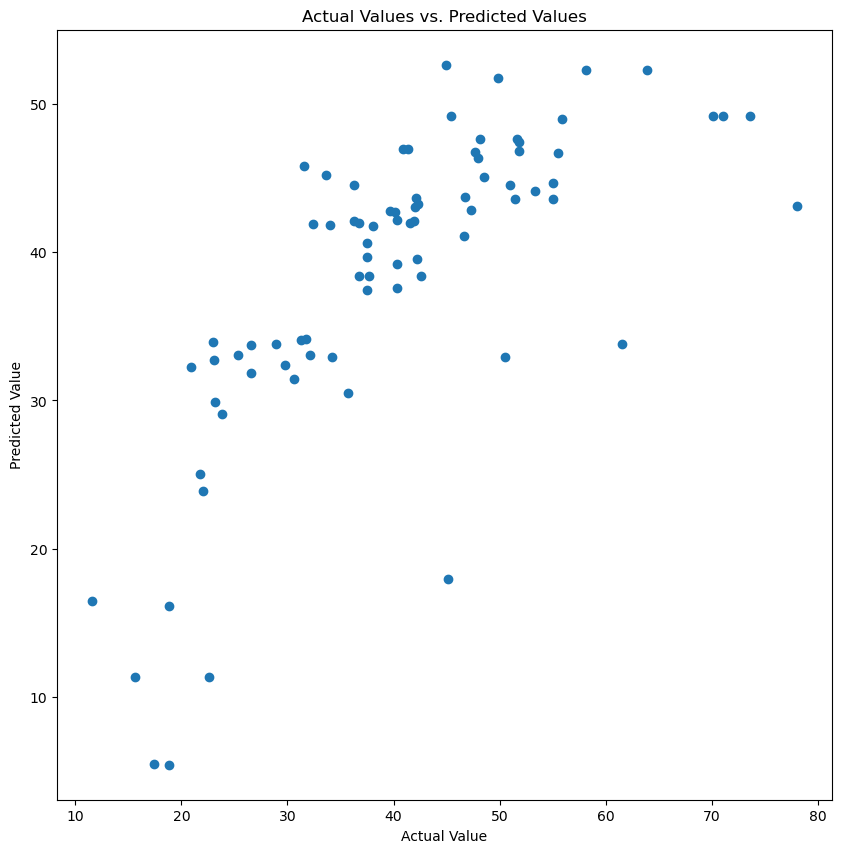

In [261]:
#Plot results

plt.figure(figsize= (10, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs. Predicted Values')

In [263]:
#Predicted Values

pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_y_df

,Actual Value,Predicted Value,Difference
0,51.4,43.554289,7.845711
1,37.5,37.434379,0.065621
2,42.3,43.244253,-0.944253
3,26.6,31.875754,-5.275754
4,51.8,47.428112,4.371888
...,...,...,...
75,50.5,32.939768,17.560232
76,41.5,41.955722,-0.455722
77,78.0,43.133140,34.866860
78,42.1,43.635728,-1.535728


In [260]:

# serialize and save the model
#   (uncomment this line of code once you're done implementing this)
# pickle.dump(reg, open("code/model/saved_models/linreg.sav", 'wb'))